In [9]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os
from code import *
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [10]:
DATA_PATH="./data/"
def get_labels(path=DATA_PATH):
	labels=os.listdir(path)
	label_indices=np.arange(0,len(labels))
	return labels, label_indices, to_categorical(label_indices)

In [11]:
def speech2mfcc(file_path,max_len=11):
	wave, sr= librosa.load(file_path, mono=True, sr=None)
	wave=wave[::5]
	mfcc=librosa.feature.mfcc(wave,sr=sr)
#	print(mfcc)
	if (max_len > mfcc.shape[1]): #.shape[1], 1-->column
		pad_width=max_len-mfcc.shape[1]
		mfcc=np.pad(mfcc,pad_width=((0,0),(0,pad_width)),mode='constant')

	else:
		mfcc=mfcc[:,:max_len]
#	print(mfcc.shape)
	return mfcc

In [12]:
def save_data_to_array(path=DATA_PATH, max_len=11):
	labels,_,_=get_labels(path)

	for label in labels:
		mfcc_vectors=[]

		speechfiles=[path + label + '/' + speech for speech in os.listdir(path+'/'+label)]
		for speech in tqdm(speechfiles,"Saving vectors to label -'{}'".format(label)):
			mfcc=speech2mfcc(speech,max_len=max_len)
			print(mfcc.shape)
			mfcc_vectors.append(mfcc)
#		print(mfcc_vectors)
		np.save(label+'.npy',mfcc_vectors)

In [13]:
def get_train_test(split_ratio=0.8,random_state=42):
	labels,indices,_=get_labels(DATA_PATH)

	X=np.load(labels[0]+'.npy')
	y=np.zeros(X.shape[0])
	
	for i,label in enumerate(labels[1:]):
		x=np.load(label+'.npy')
		X=np.vstack((X,x))
		y=np.append(y,np.full(x.shape[0],fill_value=(i+1)))
	assert X.shape[0] == len(y)
#	print(X.shape)
#	print(y)
	return train_test_split(X,y,test_size=(1-split_ratio),random_state=random_state,shuffle=True)

In [57]:
save_data_to_array()

Saving vectors to label -'1':  85%|████████▍ | 22/26 [00:00<00:00, 97.05it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'10':   8%|▊         | 2/26 [00:00<00:01, 17.46it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'10':  35%|███▍      | 9/26 [00:00<00:00, 22.63it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'10':  69%|██████▉   | 18/26 [00:00<00:00, 28.94it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'10': 100%|██████████| 26/26 [00:00<00:00, 31.14it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)



Saving vectors to label -'2':  31%|███       | 8/26 [00:00<00:00, 31.68it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'2':  46%|████▌     | 12/26 [00:00<00:00, 32.69it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'2':  85%|████████▍ | 22/26 [00:00<00:00, 36.72it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'3':  12%|█▏        | 3/26 [00:00<00:00, 28.26it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'3':  38%|███▊      | 10/26 [00:00<00:00, 31.16it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'3':  69%|██████▉   | 18/26 [00:00<00:00, 33.59it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'3':  81%|████████  | 21/26 [00:00<00:00, 24.87it/s]

(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'4':   0%|          | 0/26 [00:00<?, ?it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'4':  23%|██▎       | 6/26 [00:00<00:00, 25.98it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'4':  65%|██████▌   | 17/26 [00:00<00:00, 32.80it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'4':  81%|████████  | 21/26 [00:00<00:00, 33.80it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'5':  12%|█▏        | 3/26 [00:00<00:01, 22.76it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'5':  38%|███▊      | 10/26 [00:00<00:00, 26.62it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'5':  73%|███████▎  | 19/26 [00:00<00:00, 31.88it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'6':   0%|          | 0/26 [00:00<?, ?it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'6':  35%|███▍      | 9/26 [00:00<00:00, 31.56it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'6':  58%|█████▊    | 15/26 [00:00<00:00, 33.91it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'6':  92%|█████████▏| 24/26 [00:00<00:00, 33.67it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'7':  12%|█▏        | 3/26 [00:00<00:00, 24.73it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'7':  23%|██▎       | 6/26 [00:00<00:00, 24.16it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'7':  62%|██████▏   | 16/26 [00:00<00:00, 30.85it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'8':   0%|          | 0/26 [00:00<?, ?it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'8':  23%|██▎       | 6/26 [00:00<00:00, 21.33it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'8':  58%|█████▊    | 15/26 [00:00<00:00, 27.69it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'8':  92%|█████████▏| 24/26 [00:00<00:00, 32.39it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'9':  12%|█▏        | 3/26 [00:00<00:00, 29.27it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'9':  54%|█████▍    | 14/26 [00:00<00:00, 35.75it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'9': 100%|██████████| 26/26 [00:00<00:00, 42.93it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


In [14]:
X_train, X_test, y_train, y_test=get_train_test()
X_train=X_train.reshape(X_train.shape[0],20,11,1)
X_test=X_test.reshape(X_test.shape[0],20,11,1)
y_train_hot=to_categorical(y_train)
y_test_hot=to_categorical(y_test)

In [1]:
for step in np.arange(1,72,10)[1:]:
    weights_4=[]
    weights_6=[]
    for i in range(step-10,step):
        model=Sequential()
        model.add(Conv2D(64,kernel_size=(2,2),activation='tanh',input_shape=(20,11,1)))
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Dropout(0.4))
        model.add(Flatten())
        model.add(Dense(128,activation='relu'))
        model.add(Dropout(0.4))
        model.add(Dense(10,activation='softmax'))
        model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
    
        model.fit(X_train,y_train_hot,batch_size=128,epochs=i,verbose=1)
        
        weights_4=np.append(weights_4,model.layers[4].get_weights()[0])
        weights_6=np.append(weights_6,model.layers[6].get_weights()[0])
    
    diff_4=[]
    diff_6=[]
    for i in range(0,9):
        diff4=np.absolute(weights_4[i+1]-weights_4[i])
        diff6=np.absolute(weights_6[i+1]-weights_6[i])
    
        diff_4=np.append(diff_4,diff4)
        diff_6=np.append(diff_6,diff6)
    if step==11:
        diff_mat_4=np.average(diff_4)
        diff_mat_6=np.average(diff_6)
    else:
        diff_mat_4=np.append(diff_mat_4,np.average(diff_4))
        diff_mat_6=np.append(diff_mat_6,np.average(diff_6))

NameError: name 'np' is not defined

In [16]:
np.save('Average_Diff_mat_4.npy',diff_mat_4)
np.save('Average_Diff_mat_6.npy',diff_mat_6)

In [ ]:
mat_4=np.load('Average_Diff_mat_4.npy')
mat_6=np.load('Average_Diff_mat_6.npy')

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 19, 10, 32)        160       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 9, 5, 32)          0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 9, 5, 32)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1440)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               184448    
_________________________________________________________________
dropout_20 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1290      
Total para

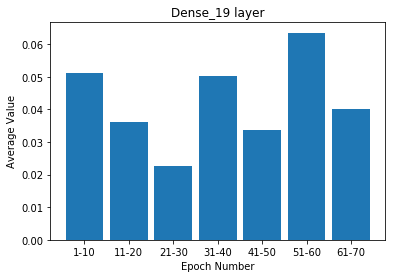

In [19]:
epoch_number=np.arange(1,71,10)
#plt.figure(figsize=(10,4))
plt.bar(epoch_number,mat_4,width=8.5)
plt.xlabel('Epoch Number')
plt.ylabel('Average Value')
plt.xticks(epoch_number,('1-10','11-20','21-30','31-40','41-50','51-60','61-70'))
plt.title('Dense_19 layer')
plt.savefig('weights_variation_4.tiff')

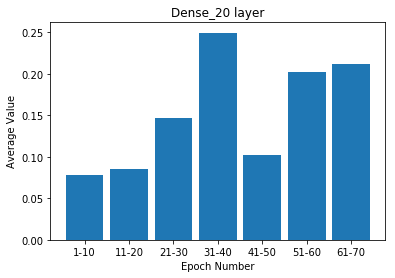

In [20]:
epoch_number=np.arange(1,71,10)
#plt.figure(figsize=(10,4))
plt.bar(epoch_number,mat_6,width=8.5)
plt.xlabel('Epoch Number')
plt.ylabel('Average Value')
plt.xticks(epoch_number,('1-10','11-20','21-30','31-40','41-50','51-60','61-70'))
plt.title('Dense_20 layer')
plt.savefig('weights_variation_6.svg')